In [9]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [10]:
n_list = [3, 4, 5, 6, 7, 8,9,10]
r = 2

In [11]:
perm_recursive_times = []
perm_iterative_times = []
comb_recursive_times = []
comb_iterative_times = []

In [12]:
def permutasi_rekursif(arr, l, r):
    if l == r:
        return 1
    count = 0
    for i in range(l, r + 1):
        arr[l], arr[i] = arr[i], arr[l]
        count += permutasi_rekursif(arr, l + 1, r)
        arr[l], arr[i] = arr[i], arr[l]
    return count

def permutasi_iteratif(arr):
    n = len(arr)
    c = [0] * n
    count = 1
    i = 0

    while i < n:
        if c[i] < i:
            if i % 2 == 0:
                arr[0], arr[i] = arr[i], arr[0]
            else:
                arr[c[i]], arr[i] = arr[i], arr[c[i]]
            count += 1
            c[i] += 1
            i = 0
        else:
            c[i] = 0
            i += 1
    return count


In [13]:
def kombinasi_rekursif(arr, r, start, depth):
    if depth == r:
        return 1
    count = 0
    for i in range(start, len(arr)):
        count += kombinasi_rekursif(arr, r, i + 1, depth + 1)
    return count

# Iteratif (Stack manual)
def kombinasi_iteratif(arr, r):
    stack = [(0, 0)]
    count = 0

    while stack:
        start, depth = stack.pop()
        if depth == r:
            count += 1
            continue
        for i in range(start, len(arr)):
            stack.append((i + 1, depth + 1))
    return count

In [14]:
for n in n_list:
    data = list(range(1, n + 1))

    start = time.time()
    permutasi_rekursif(data.copy(), 0, n - 1)
    perm_recursive_times.append(time.time() - start)

    start = time.time()
    permutasi_iteratif(data.copy())
    perm_iterative_times.append(time.time() - start)

    start = time.time()
    kombinasi_rekursif(data, r, 0, 0)
    comb_recursive_times.append(time.time() - start)

    start = time.time()
    kombinasi_iteratif(data, r)
    comb_iterative_times.append(time.time() - start)



In [15]:
table = PrettyTable()
table.field_names = [
    "n",
    "Permutasi Rekursif (s)",
    "Permutasi Iteratif (s)",
    "Kombinasi Rekursif (s)",
    "Kombinasi Iteratif (s)"
]

for i in range(len(n_list)):
    table.add_row([
        n_list[i],
        perm_recursive_times[i],
        perm_iterative_times[i],
        comb_recursive_times[i],
        comb_iterative_times[i]
    ])

print(table)

+----+------------------------+------------------------+------------------------+------------------------+
| n  | Permutasi Rekursif (s) | Permutasi Iteratif (s) | Kombinasi Rekursif (s) | Kombinasi Iteratif (s) |
+----+------------------------+------------------------+------------------------+------------------------+
| 3  | 6.9141387939453125e-06 |  5.7220458984375e-06   | 3.337860107421875e-06  | 5.4836273193359375e-06 |
| 4  |   7.62939453125e-06    |   1.52587890625e-05    | 2.1457672119140625e-06 |  2.86102294921875e-06  |
| 5  | 3.266334533691406e-05  | 2.5033950805664062e-05 | 2.384185791015625e-06  |  2.86102294921875e-06  |
| 6  | 0.0001823902130126953  | 0.00014209747314453125 |  2.86102294921875e-06  | 3.337860107421875e-06  |
| 7  | 0.0012552738189697266  | 0.0009512901306152344  | 5.245208740234375e-06  | 0.00023508071899414062 |
| 8  |  0.009869575500488281  |  0.009703874588012695  | 8.106231689453125e-06  |  9.5367431640625e-06   |
| 9  |  0.08518075942993164   |  0.06

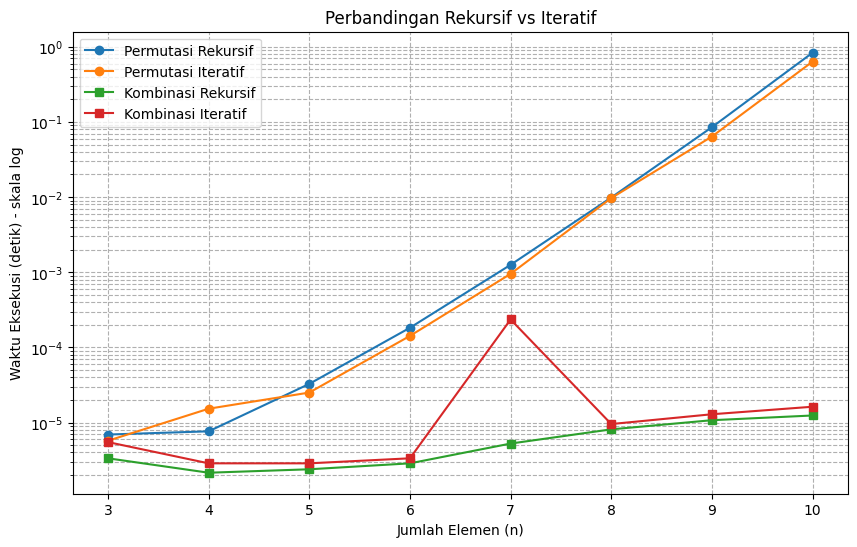

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(n_list, perm_recursive_times, marker='o', label='Permutasi Rekursif')
plt.plot(n_list, perm_iterative_times, marker='o', label='Permutasi Iteratif')
plt.plot(n_list, comb_recursive_times, marker='s', label='Kombinasi Rekursif')
plt.plot(n_list, comb_iterative_times, marker='s', label='Kombinasi Iteratif')

plt.yscale("log")  

plt.xlabel("Jumlah Elemen (n)")
plt.ylabel("Waktu Eksekusi (detik) - skala log")
plt.title("Perbandingan Rekursif vs Iteratif")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

    